In [1]:
#Настройка панндас

In [2]:
import numpy as np
import pandas as pd


In [3]:
from datetime import datetime, date

In [4]:
# Задаем некоторые опции pandas, котрые настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 180)

In [5]:
# Импортируем mathplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [7]:
s[[1,3]]

1    2
3    4
dtype: int64

In [8]:
s = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
s[['a', 'd']]

a    1
d    4
dtype: int64

In [9]:
s[[1, 3]]

b    2
d    4
dtype: int64

In [10]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
# Создаем объект Series, индекс которого серия дат между двумя определенными датами (включительно)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04', '2016-04-05', '2016-04-06'], dtype='datetime64[ns]', freq='D')

In [12]:
# Данный тип серии называется - временным редом.
temps1 = pd.Series([80, 82, 85, 90, 83, 87], index = dates)
temps1


2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [13]:
temps1['2016-04-03']

85

In [14]:
temps2 = pd.Series([70, 75, 69, 83, 79, 77], index = dates)
temp_diffs = temps1 - temps2
temp_diffs, temp_diffs[2]

(2016-04-01    10
 2016-04-02     7
 2016-04-03    16
 2016-04-04     7
 2016-04-05     4
 2016-04-06    10
 Freq: D, dtype: int64,
 16)

In [15]:
temp_diffs.mean()

9.0

In [16]:
# Создаем объект DataFrame с двумя сериями
temps_df = pd.DataFrame({
    'Missoula': temps1,
    'Philadelphia': temps2
});
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [17]:
# Извлекаем значение конкретного столбца
temps_df['Missoula']
# Если имя столбца НЕ ИМЕЕТ ПРОБЕЛОВ то можно вызвать столбец без скобок
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [18]:
# Вывод обоих столбцов (тут испльзуется синтаксис numpy)
temps_df[['Philadelphia', 'Missoula']]


            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [19]:
# Добавим новый новый столбец в объект dataFrame исппользуя ИНДЕКСАТОР МАССИВА []
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [20]:
# Получим список столбцов, который также явл. объектом Index
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [21]:
# Делаем срез с 1 по 3 строк включительно
temps_df[1:4]

            Missoula  Philadelphia  Difference
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7

In [22]:
# Получаем строку, которой соответствует метка индекса 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [23]:
# Имена столбцов стали индексом, мы повернули их.
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [24]:
# Получение значение столбца difference в строках 1, 3, 5
temps_df.iloc[[1,3,5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [25]:
# Какие значения в столбце Missoula > 82
temps_df.Missoula > 82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [26]:
# Возвращаем строки в которых значение в столбце Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [27]:
"""" Считываем данные и указываем пандасу вернуть значение столбца с датами в отформатированном
виде - т.е соответсутющем раельным датам."""
df = pd.read_csv('./Notebooks/Data/goog.csv', 
                 parse_dates=['Date'],
                index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [28]:
 type(df.index[0])


pandas._libs.tslibs.timestamps.Timestamp

In [29]:
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06',
               '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17'],
              dtype='datetime64[ns]', name='Date', freq

<AxesSubplot:xlabel='Date', ylabel='myClose'>

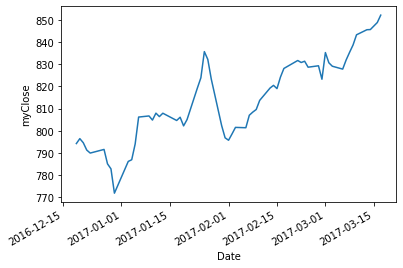

In [32]:
df.Close.plot(ylabel='myClose')
#df.head()
##df.plot(y=df.Close, kind='line')
